In [242]:
using Pkg 
Pkg.activate("..") 
Pkg.resolve()
Pkg.add("DataFrames")
using DataFrames

 Resolving package versions...
  Updating `~/Project.toml`
 [no changes]
  Updating `~/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/Project.toml`
 [no changes]
  Updating `~/Manifest.toml`
 [no changes]


In [224]:
import CSV
#import market-level financial data
fin = DataFrame(CSV.read("Financials_2016_b.csv"))
#keep only full markets (not separating franco vs anglo, etc.)
fin_full = fin[fin[:full].>0,:]

,Market,full,Reporting Units,Local Time Sales,National Time Sales,Syndication-Production,Government/Corporate Grants,Other Revenue,Total Revenue,Programming and Production,Technical,Sales and Promotion,Administration and General,Total Expenses,Operating Income,Depreciation,P.B.I.T.,Interest Expense,Adjustments Gain(Loss),Pre-tax Profit,Prog-Prod Expense / Expense Total,Prog-Prod Expense / Revenue Total,Total Remuneration ($),Total Staff Count,Avg Remuneration ($),Avg Remuneration excl. Benefits ($),Operating Margin,P.B.I.T. Margin,Pre-tax Margin
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Calgary Total,1.0,20.0,5.53786e7,3.23486e7,193955.0,0.0,679331.0,8.86004e7,2.9013e7,2.59388e6,1.93568e7,1.73283e7,6.8292e7,2.03084e7,2.73006e6,1.75783e7,528361.0,-3.39178e6,1.36582e7,42.5,32.7,3.21005e7,375.92,85392.0,77746.0,22.9,19.8,15.4
2,Edmonton Total,1.0,19.0,4.94895e7,2.85368e7,165950.0,0.0,1.22381e6,7.9416e7,2.67904e7,2.41144e6,1.8906e7,1.33974e7,6.15052e7,1.79108e7,2.32425e6,1.55865e7,4.19655e6,2.85108e7,3.99008e7,43.6,33.7,3.0466e7,345.26,88241.0,80498.0,22.6,19.6,50.2
3,Grande Prairie,1.0,5.0,9.88552e6,2.46077e6,0.0,0.0,131231.0,1.24775e7,3.05177e6,382492.0,2.68326e6,2.50262e6,8.62014e6,3.85738e6,277457.0,3.57993e6,176518.0,-396798.0,3.00661e6,35.4,24.5,4.52323e6,74.62,60617.0,54626.0,30.9,28.7,24.1
4,Halifax,1.0,11.0,1.36999e7,6.7625e6,53811.0,0.0,119421.0,2.06357e7,6.61073e6,907511.0,5.625e6,4.66426e6,1.78075e7,2.82818e6,781668.0,2.04651e6,238700.0,-13338.0,1.79447e6,37.1,32.0,8.95833e6,125.33,71478.0,64117.0,13.7,9.9,8.7
5,Hamilton,1.0,7.0,1.12e7,5.6e6,67633.0,0.0,400081.0,1.72677e7,5.65455e6,1.22482e6,4.08498e6,3.39693e6,1.43613e7,2.90642e6,405458.0,2.50096e6,-45654.0,1.33024e7,1.58491e7,39.4,32.7,7.4902e6,95.06,78794.0,70996.0,16.8,14.5,91.8
6,Kelowna,1.0,7.0,7.29335e6,1.74715e6,121881.0,0.0,17555.0,9.17993e6,3.29664e6,522844.0,3.58615e6,2.50152e6,9.90715e6,-727220.0,226431.0,-953651.0,106948.0,-229167.0,-1.28977e6,33.3,35.9,5.75447e6,86.27,66703.0,59257.0,-7.9,-10.4,-14.0
7,Kingston,1.0,6.0,3.97233e6,2.90071e6,16374.0,0.0,13909.0,6.90332e6,2.33075e6,331133.0,1.93581e6,1.62361e6,6.2213e6,682026.0,217068.0,464958.0,-8666.0,-75100.0,398524.0,37.5,33.8,3.43963e6,46.95,73262.0,63632.0,9.9,6.7,5.8
8,Kitchener,1.0,7.0,1.40324e7,8.05054e6,15978.0,0.0,42278.0,2.21412e7,7.29228e6,520584.0,4.14332e6,4.14686e6,1.6103e7,6.03815e6,575319.0,5.46283e6,-63659.0,1.12544e7,1.67809e7,45.3,32.9,7.64948e6,90.34,84674.0,74735.0,27.3,24.7,75.8
9,Lethbridge,1.0,6.0,6.5971e6,2.59266e6,15472.0,0.0,3850.0,9.20908e6,2.76679e6,368031.0,2.34662e6,2.00454e6,7.48598e6,1.72311e6,174559.0,1.54855e6,166315.0,-84124.0,1.29811e6,37.0,30.0,3.88139e6,65.33,59412.0,53534.0,18.7,16.8,14.1


In [225]:
#now load listening data for the same cities
listening = DataFrame(CSV.read("Listening_fall_2016.csv"))

#concatenate the two sets
df_full = join(fin_full,listening,on = :Market)

,Market,full,Reporting Units,Local Time Sales,National Time Sales,Syndication-Production,Government/Corporate Grants,Other Revenue,Total Revenue,Programming and Production,Technical,Sales and Promotion,Administration and General,Total Expenses,Operating Income,Depreciation,P.B.I.T.,Interest Expense,Adjustments Gain(Loss),Pre-tax Profit,Prog-Prod Expense / Expense Total,Prog-Prod Expense / Revenue Total,Total Remuneration ($),Total Staff Count,Avg Remuneration ($),Avg Remuneration excl. Benefits ($),Operating Margin,P.B.I.T. Margin,Pre-tax Margin,Universe,Share %,Ctrl Reach (000),FC Reach (000)
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰
1,Calgary Total,1.0,20.0,5.53786e7,3.23486e7,193955.0,0.0,679331.0,8.86004e7,2.9013e7,2.59388e6,1.93568e7,1.73283e7,6.8292e7,2.03084e7,2.73006e6,1.75783e7,528361.0,-3.39178e6,1.36582e7,42.5,32.7,3.21005e7,375.92,85392.0,77746.0,22.9,19.8,15.4,1235000,92.0,1731.5,1731.5
2,Edmonton Total,1.0,19.0,4.94895e7,2.85368e7,165950.0,0.0,1.22381e6,7.9416e7,2.67904e7,2.41144e6,1.8906e7,1.33974e7,6.15052e7,1.79108e7,2.32425e6,1.55865e7,4.19655e6,2.85108e7,3.99008e7,43.6,33.7,3.0466e7,345.26,88241.0,80498.0,22.6,19.6,50.2,1174000,90.0,1581.1,1581.1
3,Grande Prairie,1.0,5.0,9.88552e6,2.46077e6,0.0,0.0,131231.0,1.24775e7,3.05177e6,382492.0,2.68326e6,2.50262e6,8.62014e6,3.85738e6,277457.0,3.57993e6,176518.0,-396798.0,3.00661e6,35.4,24.5,4.52323e6,74.62,60617.0,54626.0,30.9,28.7,24.1,missing,missing,missing,missing
4,Halifax,1.0,11.0,1.36999e7,6.7625e6,53811.0,0.0,119421.0,2.06357e7,6.61073e6,907511.0,5.625e6,4.66426e6,1.78075e7,2.82818e6,781668.0,2.04651e6,238700.0,-13338.0,1.79447e6,37.1,32.0,8.95833e6,125.33,71478.0,64117.0,13.7,9.9,8.7,369170,46.8,374.1,484.9
5,Hamilton,1.0,7.0,1.12e7,5.6e6,67633.0,0.0,400081.0,1.72677e7,5.65455e6,1.22482e6,4.08498e6,3.39693e6,1.43613e7,2.90642e6,405458.0,2.50096e6,-45654.0,1.33024e7,1.58491e7,39.4,32.7,7.4902e6,95.06,78794.0,70996.0,16.8,14.5,91.8,683590,31.0,419.9,1254.9
6,Kelowna,1.0,7.0,7.29335e6,1.74715e6,121881.0,0.0,17555.0,9.17993e6,3.29664e6,522844.0,3.58615e6,2.50152e6,9.90715e6,-727220.0,226431.0,-953651.0,106948.0,-229167.0,-1.28977e6,33.3,35.9,5.75447e6,86.27,66703.0,59257.0,-7.9,-10.4,-14.0,175050,71.7,189.8,230.8
7,Kingston,1.0,6.0,3.97233e6,2.90071e6,16374.0,0.0,13909.0,6.90332e6,2.33075e6,331133.0,1.93581e6,1.62361e6,6.2213e6,682026.0,217068.0,464958.0,-8666.0,-75100.0,398524.0,37.5,33.8,3.43963e6,46.95,73262.0,63632.0,9.9,6.7,5.8,151780,62.0,161.6,236.6
8,Kitchener,1.0,7.0,1.40324e7,8.05054e6,15978.0,0.0,42278.0,2.21412e7,7.29228e6,520584.0,4.14332e6,4.14686e6,1.6103e7,6.03815e6,575319.0,5.46283e6,-63659.0,1.12544e7,1.67809e7,45.3,32.9,7.64948e6,90.34,84674.0,74735.0,27.3,24.7,75.8,456930,46.1,406.3,648.7
9,Lethbridge,1.0,6.0,6.5971e6,2.59266e6,15472.0,0.0,3850.0,9.20908e6,2.76679e6,368031.0,2.34662e6,2.00454e6,7.48598e6,1.72311e6,174559.0,1.54855e6,166315.0,-84124.0,1.29811e6,37.0,30.0,3.88139e6,65.33,59412.0,53534.0,18.7,16.8,14.1,102560,74.2,116.1,221.2


In [226]:
#Compute measures of price, quantity and costs. The costs and quantity measures will be per week (assuming 52 weeks in a year)

rename!(df_full, [x => replace(string(x), "Reporting Units" => "stations")|> Symbol for x in names(df_full)]); 

#Q_N
rename!(df_full, [x => replace(string(x), "Ctrl Reach (000)" => "listeners_per_week")|> Symbol for x in names(df_full)]);

#F_N, assuming all fixed costs are homogenous across stations in a market
df_full[:costs_per_station] = df_full[Symbol("Total Expenses")]./df_full[:stations];
df_full[:costs_per_station_per_week] = df_full[:costs_per_station]./52;

#p_N
df_full[:ad_revenue_per_week] = df_full[Symbol("Local Time Sales")]./52
df_full[:price] = df_full[:ad_revenue_per_week]./df_full[:listeners_per_week];

In [235]:
#Print selected summary statistics for 2016.
describe(df_full)[21:37,:]

sumstats = describe(df_full)[[1,3,4,14,30,32,35,37],1:5]
sumstats[2,1] = Symbol("Stations (N)")
sumstats[5,1] = Symbol("Universe (S)")
sumstats[6,1] = Symbol("Number of Weekly Listeners (Q_N)")
sumstats[7,1] = Symbol("Costs Per Station Per Week (F_N)")
sumstats[8,1] = Symbol("Ad Selling Price Per Listener (p_N)")
sumstats

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Market,,Calgary Total,,Winnipeg Total
2,Stations (N),10.4138,4.0,7.0,32.0
3,Local Time Sales,2.41276e7,1.88147e6,1.22887e7,1.37708e8
4,Total Expenses,3.02774e7,2.48791e6,1.43613e7,1.81793e8
5,Universe (S),7.66959e5,92090,355540.0,5321000
6,Number of Weekly Listeners (Q_N),868.323,113.8,356.0,5468.5
7,Costs Per Station Per Week (F_N),43257.7,11961.1,33613.7,1.09251e5
8,Ad Selling Price Per Listener (p_N),794.103,340.457,663.047,1860.34


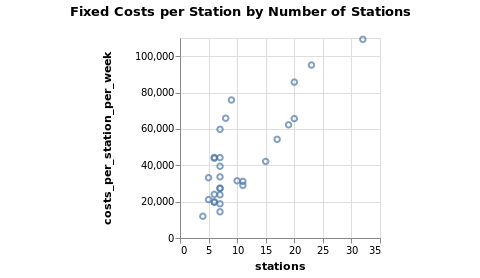

In [236]:
using VegaLite;

df_full |>
@vlplot(:point,
    title= "Fixed Costs per Station by Number of Stations",
    enc={
      x={:stations},
      y={:costs_per_station_per_week}
    }
)

Strong correlation between the number of stations and the fixed costs per station.

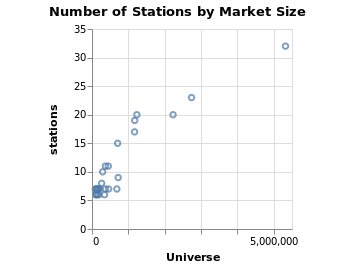

In [240]:
df_full |>
@vlplot(:point,
    title= "Number of Stations by Market Size",
    enc={
      x={:Universe},
      y={:stations}
    }
)

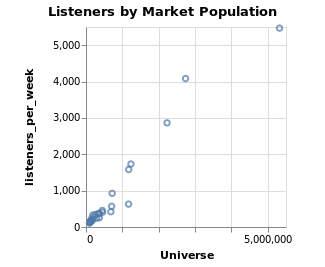

In [237]:
df_full |>
@vlplot(:point,
    title= "Listeners by Market Population",
    enc={
      x={:Universe},
      y={:listeners_per_week}
    }
)

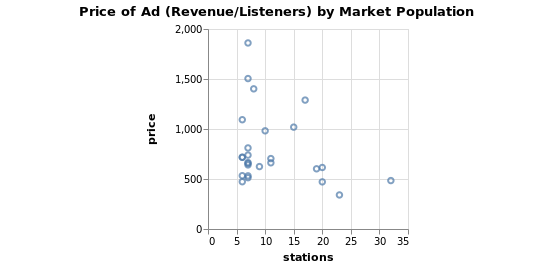

In [241]:
df_full |>
@vlplot(:point,
    title= "Price of Ad (Revenue/Listeners) by Market Population",
    enc={
      x={:stations},
      y={:price}
    }
)